In [14]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt

loaded_data = cifar10.load_data()

loaded_data[0][0].shape
import random

#plt.imshow(loaded_data[0][0][random.randint(0,50_000)])

batch_size = 10
index = random.randint(0,49_000)
loaded_data[0][0][index:index+batch_size].shape

(10, 32, 32, 3)

In [54]:
import pandas as pd

benchmark_df = pd.read_csv("memory_test.csv",index_col="id")
benchmark_df.head()

,method,batch_size,serialize_time,deserialize_time,send_time,ready_time,payload_size
id,,,,,,,
0,nprecarray,1,104962,413063,1039666,1952430,24952
1,uproot,1,2295561,3377481,2452841,8948080,31352
2,npfull,1,145526,233141,782752,1361743,24920
3,npfull_lz4,1,95334,235130,562088,1065473,8064
4,nprecarray,1,88574,285285,1035535,1693812,24952


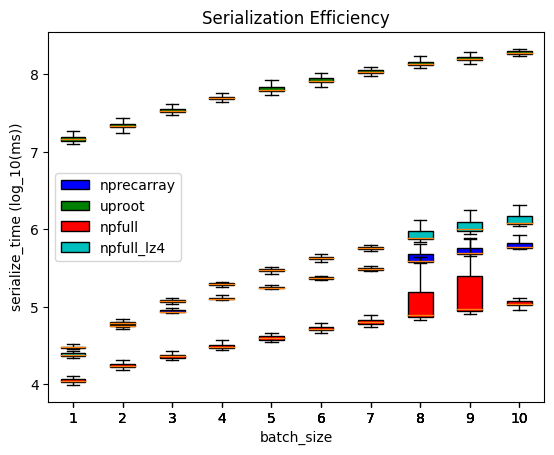

In [55]:
import numpy as np
import matplotlib.pyplot as plt
# benchmark_df[["method","batch_size","serialize_time"]].groupby(["method","batch_size"])

def generate_box_whisker(benchmark_df,title, metric,unit,scaler=None):
    df = benchmark_df[["method","batch_size", metric]]
    unique_methods = df["method"].unique()
    unique_batches = df["batch_size"].unique()
    colors  = ["b","g","r","c","m","y"]
    boxes = []
    for i,method in enumerate(unique_methods):
        group = df[df["method"] == method]
        collections = []
        for batch_size in unique_batches:
            y = group[group["batch_size"] == batch_size][metric].values
            if scaler is not None:
                y = scaler(y)
            collections.append(y)

        plt.xlabel("batch_size")
        plt.ylabel(f"{metric} ({unit})")
        plt.title(title)
        box = plt.boxplot(collections, positions=unique_batches,patch_artist=True,boxprops={"facecolor":colors[i]},showfliers=False)
        boxes.append(box)

    plt.legend([box["boxes"][0] for box in boxes],unique_methods)

generate_box_whisker(benchmark_df,"Serialization Efficiency","serialize_time","log_10(ms)",scaler=lambda x: np.log(x/1_000))

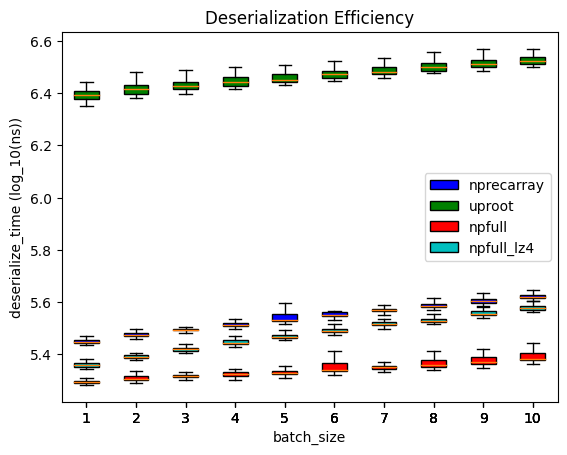

In [56]:
generate_box_whisker(benchmark_df,"Deserialization Efficiency", "deserialize_time","log_10(ns)",scaler=lambda x: np.log10(x))

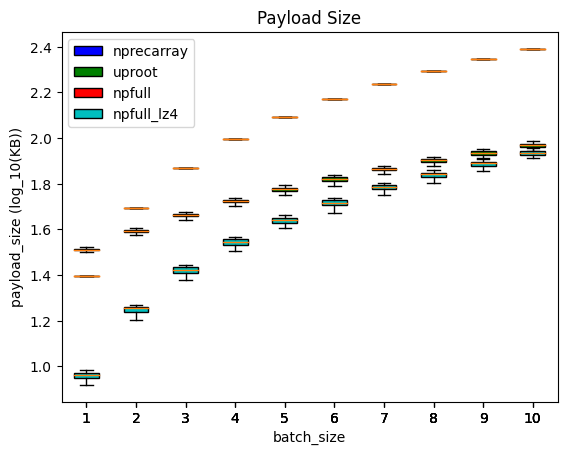

In [57]:
generate_box_whisker(benchmark_df, "Payload Size", "payload_size","log_10(KB)",scaler=lambda x: np.log10(x/1000))

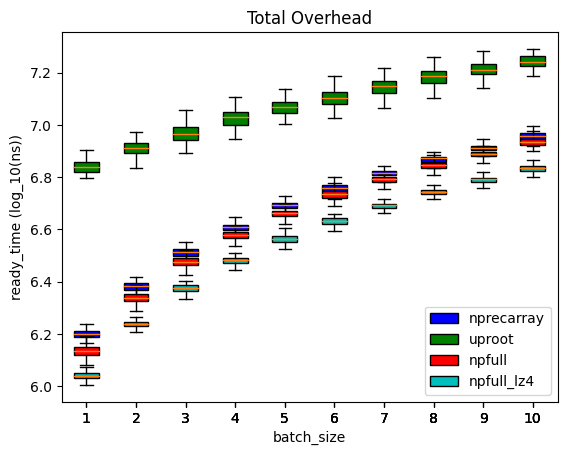

In [58]:
generate_box_whisker(benchmark_df, "Total Overhead", "ready_time","log_10(ns)",scaler=lambda x: np.log10(x))